<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/KMeansLab_SOLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering Lab - CS 4372

In this lab, we will apply the K-means algorithm on synthetic as well as real dataset and also learn about machine learning pipelines.

You will need to complete the steps mentioned below and turn in the completed notebook. You can share the link of the finished notebook.

# Generate Synthetic Dataset Suitable For Clustering
We will use the following snippet to load libraries and generate some synthetic data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=2,
                  centers=3, random_state=random_state)


Let's plot this 2-D dataset

<Axes: >

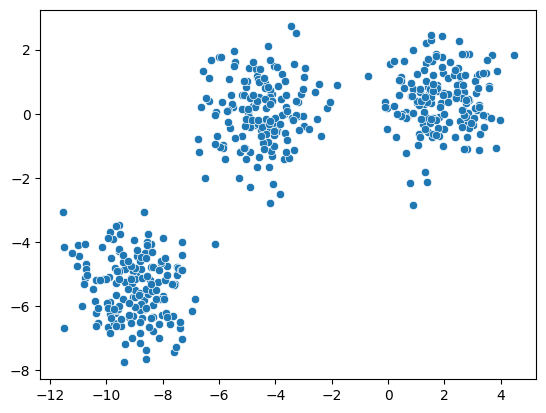

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1])

Now, it's your turn to create a synthetic dataset of 3 dimensions consisting of three clusters. You will also need to visualize this data using a 3-D plot. You can use any suitable library.

In [ ]:
# TODO: Create a 3 feature dataset generated using 3 clusters and plot it.
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=3,
                  centers=3, random_state=random_state)


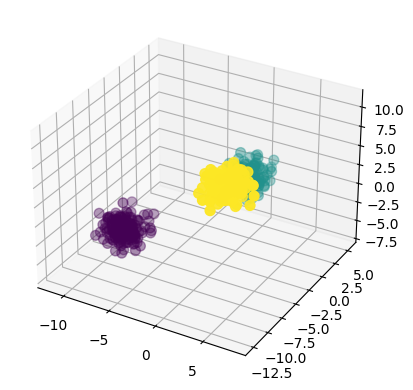

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=50)

## Clustering using k-means

Let's go back to the 2-D dataset generated earlier and let's try to cluster it using k-means. We know how many clusters are *actually* there.

In [ ]:
predicted_clusters = 2 # need to play with this to get the correct value
max_iter = 100
random_state = 42

km = KMeans(n_clusters=predicted_clusters, random_state=random_state, max_iter=max_iter)

In [ ]:
km

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [ ]:
y_pred = km.fit_predict(X)

## Visualization of Clusters

Let's create side-by-side plots of actual vs clustered data
for the clustered data, we also want to include the predicted centers

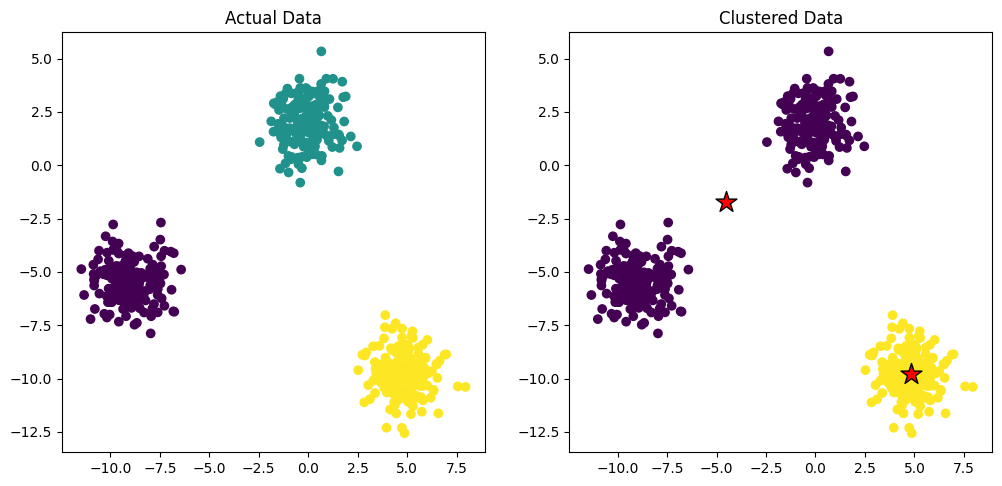

In [ ]:


plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Data")

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clustered Data")

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.show()

## WCSS and Silhouette Score

Let's compute the evaluation criteria for clustering: WCSS and Silhouette score

In [ ]:
km.inertia_

14877.992173039403

In [ ]:
silhouette_score(X, y_pred)

0.6686894598427355

## Finding Best Hyperparameters

We want to automatically try various values of the hyperparameter k and obtain the evaluation criteria to see which values are the best.

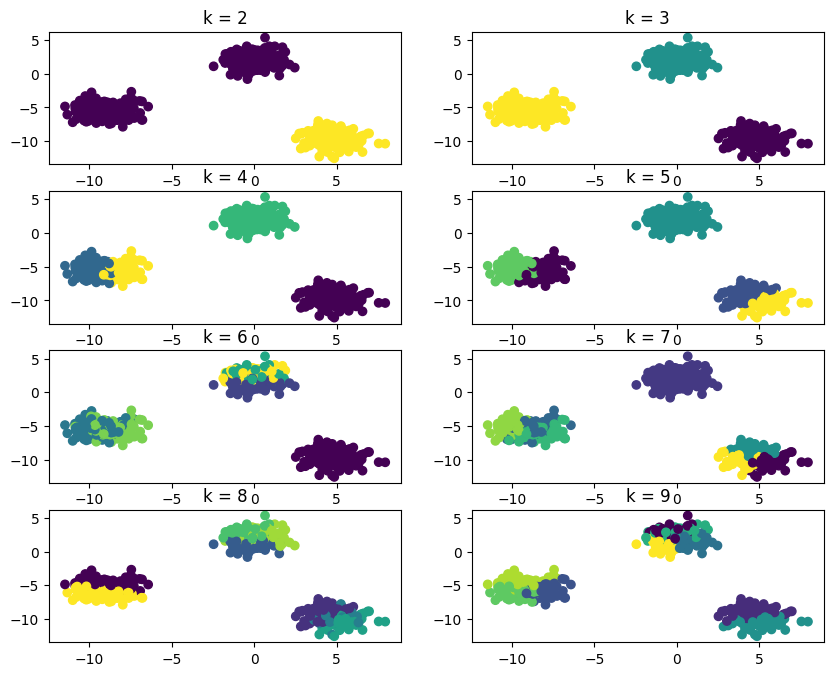

In [ ]:
plt.figure(figsize=(10, 10))

i = 1
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)
  plt.subplot(5, 2, i)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.title("k = " + str(k))
  i = i + 1

plt.show()

Now, try to find the WCSS and Silhouette width for each value of k and plot them. Which seems to be the best value for k?

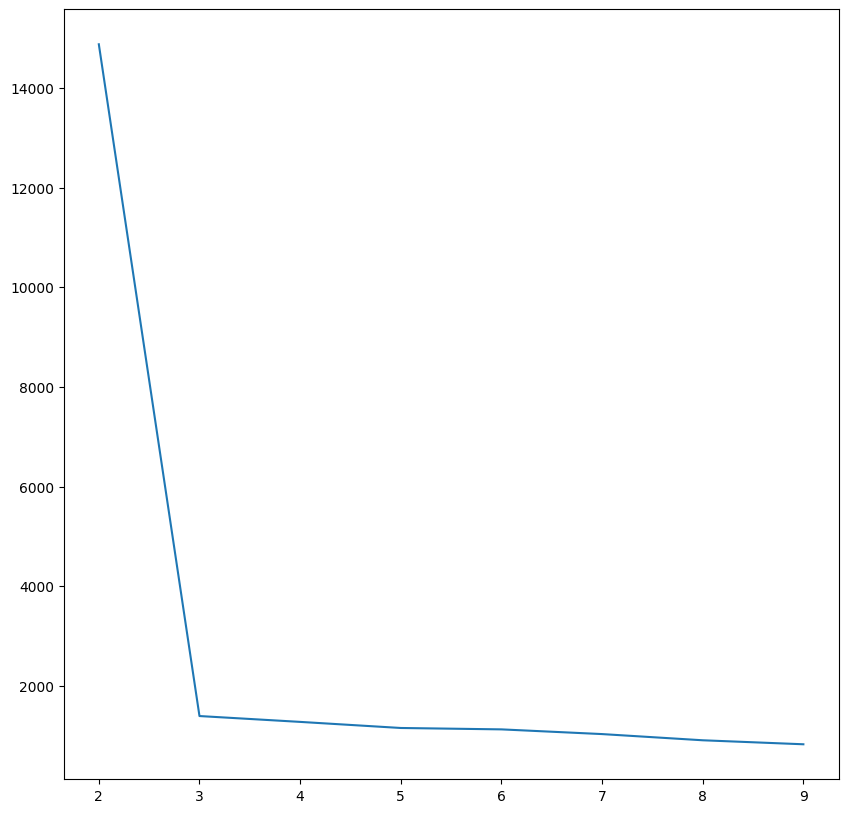

In [ ]:
# TODO: Code what is stated above.
plt.figure(figsize=(10, 10))

WCSS = []

i = 0
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)
  WCSS.append(km.inertia_)
  i = i + 1

plt.plot(range(2,10), WCSS)
plt.show()


# Working with the California Housing Dataset

Download the California housing dataset

In [ ]:
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/main/housing_clustering.csv")

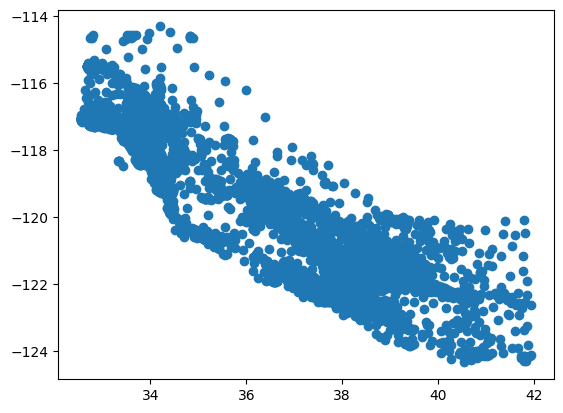

In [ ]:
#TODO: Make a scatter plot of latitude and longitude
#TODO: Make a scatter plot of latitude and longitude
X = housing['latitude']
Y = housing['longitude']
plt.scatter(X, Y)
plt.show()

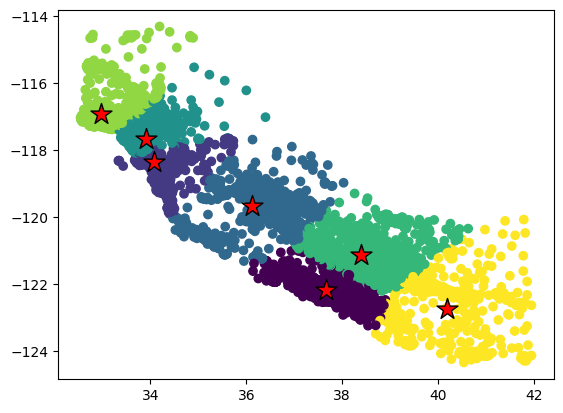

In [ ]:
#TODO: Perform K-Means clustering and check if the centers resemble the location of major cities/areas in California

k = 7
my_cols = housing[['latitude', 'longitude']]

km = KMeans(n_clusters=k)
km.fit_transform(my_cols)

X = housing['latitude']
Y = housing['longitude']
plt.scatter(X, Y, c=km.labels_)
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.show()


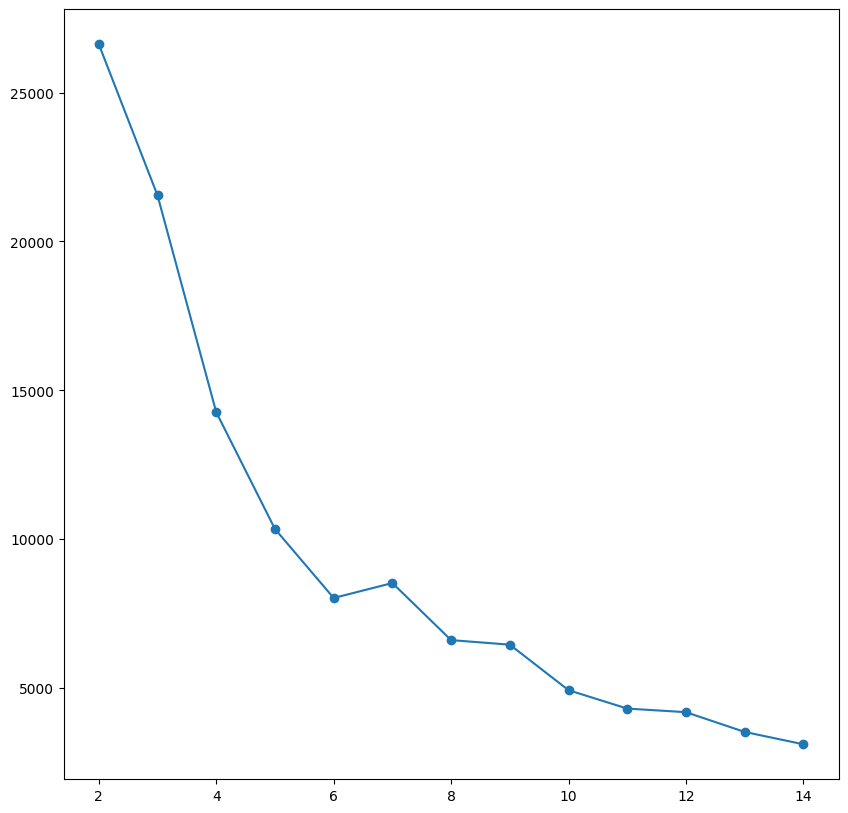

In [ ]:
#TODO: Using WCSS or Silhouette Width, find best value of K

# TODO: Code what is stated above.
plt.figure(figsize=(10, 10))

WCSS = []

i = 0
for k in range(2, 15):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(my_cols)
  WCSS.append(km.inertia_)
  i = i + 1

plt.plot(range(2,15), WCSS, marker='o')
plt.show()

## Working with US Arrests Data and Pipelines

Let's read the USArrests data that can be downloaded from:

https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv


In [ ]:
# TODO: Read in the file to a dataframe and ensure everything is loaded properly
arrests = pd.read_csv("https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv", index_col=0)

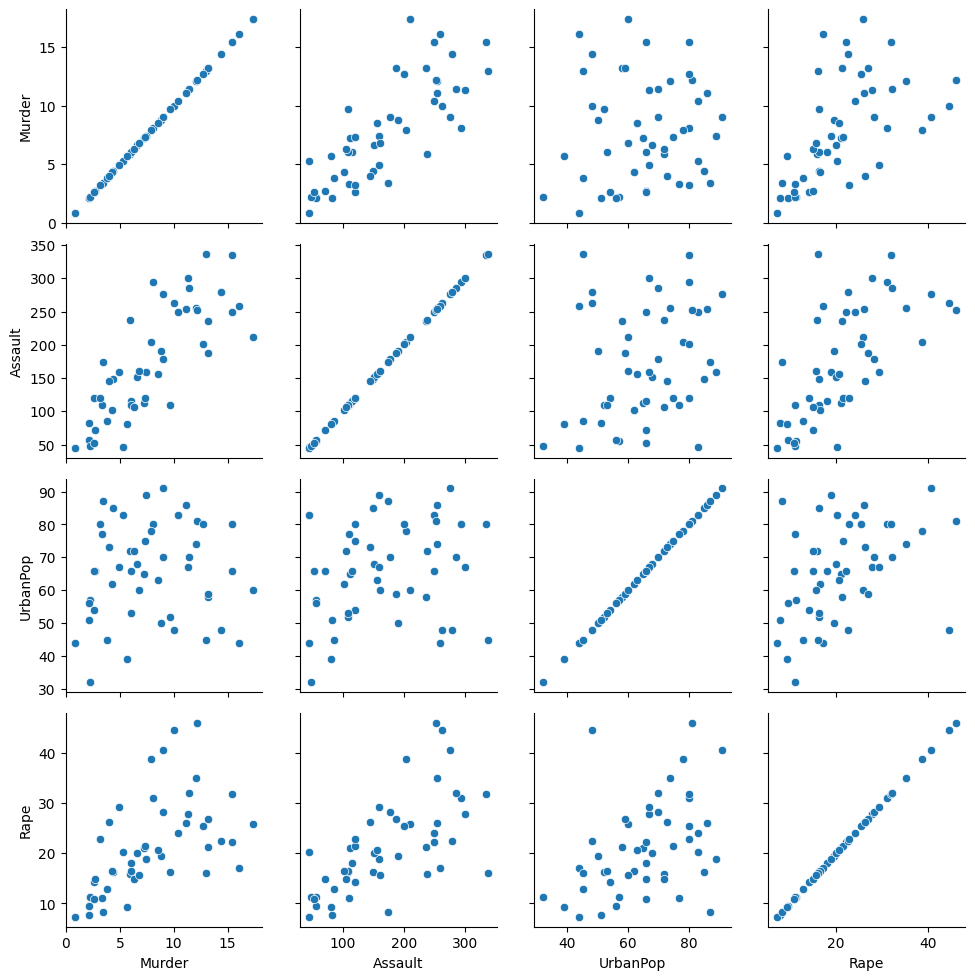

In [ ]:
# TODO: Create a pairwise scatter plot and visualize relationships between variables
# https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships
g = sns.PairGrid(arrests)
g.map(sns.scatterplot)

In [ ]:
# TODO: Let's create a pipeline of scaler and then k-means and use it on the dataset
kmeansPipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("kmeans", KMeans(n_clusters=4, max_iter=500)),
    ]
)

In [ ]:
# TODO: apply the pipeline on the data

kmeansPipeline.fit_predict(arrests)

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 2, 3, 1, 0, 2, 0,
       1, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [ ]:
# TODO: try various values of k and check which value of k may be the best
arrests["label"] = kmeansPipeline["kmeans"].labels_

In [ ]:
# TODO: I would like to see which states belong to which cluster. Output that data in a suitable format.
arrests.sort_values("label")

,Murder,Assault,UrbanPop,Rape,label
Illinois,10.4,249,83,24.0,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
New Mexico,11.4,285,70,32.1,0
Michigan,12.1,255,74,35.1,0
Florida,15.4,335,80,31.9,0
Maryland,11.3,300,67,27.8,0
Nevada,12.2,252,81,46.0,0


In [ ]:
#TODO: I would like to live in a state that is different in crime from TX. What choices do I have? Which states have lowest crime profiles?

# Hierarchical Clustering

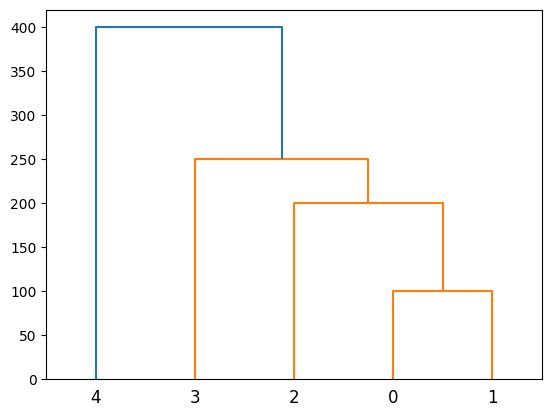

In [ ]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Create an array
x = np.array([100., 200., 300., 400., 500., 250.,
              450., 280., 450., 750.])

# Plot the hierarchical clustering as a dendrogram.
link = hierarchy.linkage(x, 'single')
plt.figure()

dn = hierarchy.dendrogram(link)



<Figure size 640x480 with 0 Axes>

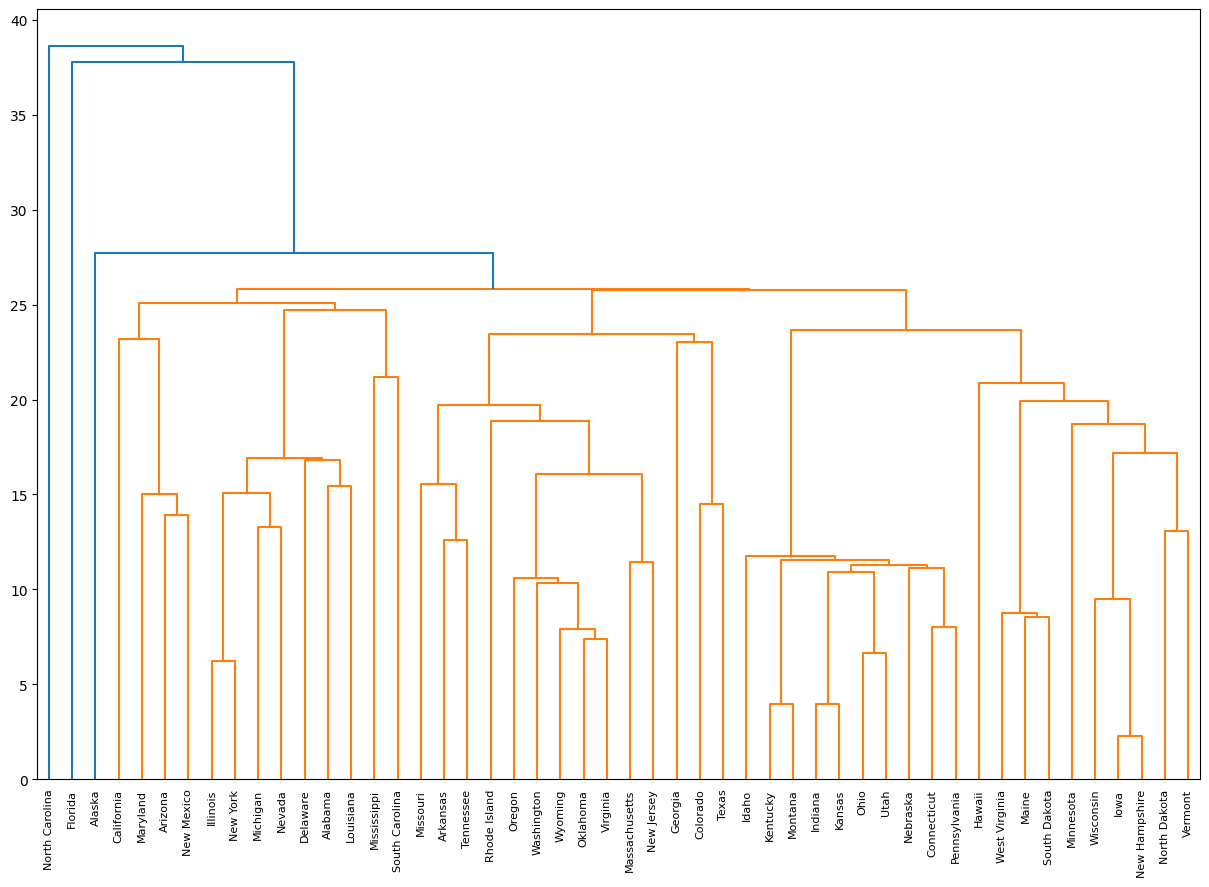

In [ ]:
temp = hierarchy.linkage(np.array(arrests), 'single')
plt.figure()
plt.figure(figsize=(15, 10))
dn = hierarchy.dendrogram(
    temp, labels = arrests.index)

# Density Based Clustering

In [ ]:
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=2,
                  centers=3, random_state=random_state)


In [ ]:
df = pd.DataFrame(X)
df['label'] = y

In [ ]:
df.columns = df.columns.astype(str)

In [ ]:
df.head()

,0,1,label
0,2.686260,-0.296126,2
1,0.636612,0.055447,2
2,-4.803475,0.248127,1
3,3.217861,-1.140347,2
4,-9.958776,-6.649059,0


In [ ]:
nn = NearestNeighbors(n_neighbors=100).fit(df)
distances, indices = nn.kneighbors(df)

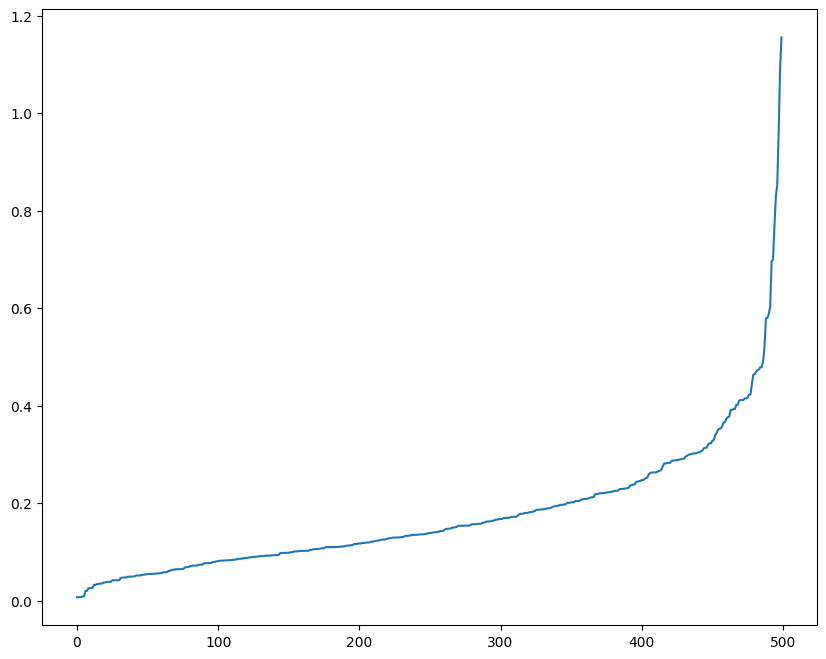

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.8, min_samples=30).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 105


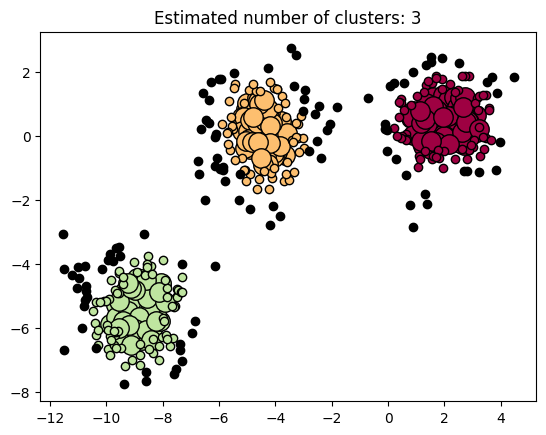

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()